## Predictive Modeling of Heart Disease

### Acknowledgement of Dataset
**Heart Disease UCI:** [https://archive.ics.uci.edu/ml/datasets/Heart+Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

**Database Source:**

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of
Information and Computer Science. 

**Database Creators:**
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

### Features

| Feature                | Description                                                | Units        |
|------------------------|------------------------------------------------------------|--------------|
| age                    | Age                                                        | Years        |
| sex                    | Sex                                                        | -            |
| cp                     | Chest pain type (4 values)                                 | -            |
| trestbps               | Resting blood pressure (in mm Hg on admission to the hospital) | mm Hg        |
| chol                   | Serum cholesterol                                          | mg/dl        |
| fbs                    | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)      | -            |
| restecg                | Resting electrocardiographic results (values 0 = normal, 1, 2) | -            |
| thalach                | Maximum heart rate achieved                                | bpm          |
| exang                  | Exercise induced angina (1 = yes; 0 = no)                  | -            |
| oldpeak                | ST depression induced by exercise relative to rest         | -            |
| slope                  | The slope of the peak exercise ST segment (values 1 = upsloping, 2 = flat, 3 = downsloping) | -            |
| ca                     | Number of major vessels (0-3) colored by fluoroscopy       | -            |
| thal                   | 3 = normal; 6 = fixed defect; 7 = reversible defect        | -            |



In [23]:
%pip install seaborn

In [24]:
'''
Import pandas, NumPy, Matplotlib and Seaborn.
Import the following from sklearn:
  - metrics and svm;
  - GaussianNB from naive_bayes;
  - confusion_matrix, plot_confusion_matrix, classification_report from metrics
  - LogisticRegression from linear_model
'''

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

print('Libraries have been imported.')

Libraries have been imported.


In [25]:
# Read in the dataset heart.csv using pandas

heart = pd.read_csv('heart.csv')

In [26]:
# Read first 5 rows of the dataset

heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
# Rename the columns for better readability

columns_names = {'cp':'chest_pain_type',
                 'trestbps':'resting_blood_pressure',
                 'exang':'exercise_ang',
                 'chol': 'serum_cholesterol', 
                 'fbs': 'fasting_blood_sugar',
                 'exang': 'exercise_ang',
                 'thal': 'max_heart_rate'}

# pandas rename() method and input columns_names to it

heart.rename(columns=columns_names, inplace=True)

In [28]:
# Display the updated datatypes for all the features

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     303 non-null    int64  
 1   sex                     303 non-null    int64  
 2   chest_pain_type         303 non-null    int64  
 3   resting_blood_pressure  303 non-null    int64  
 4   serum_cholesterol       303 non-null    int64  
 5   fasting_blood_sugar     303 non-null    int64  
 6   restecg                 303 non-null    int64  
 7   thalach                 303 non-null    int64  
 8   exercise_ang            303 non-null    int64  
 9   oldpeak                 303 non-null    float64
 10  slope                   303 non-null    int64  
 11  ca                      303 non-null    int64  
 12  max_heart_rate          303 non-null    int64  
 13  target                  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.

In [29]:
# Check for NaN values

heart.isna().any()

age                       False
sex                       False
chest_pain_type           False
resting_blood_pressure    False
serum_cholesterol         False
fasting_blood_sugar       False
restecg                   False
thalach                   False
exercise_ang              False
oldpeak                   False
slope                     False
ca                        False
max_heart_rate            False
target                    False
dtype: bool

In [30]:
# Check the number of missing values per feature

heart.isna().sum()

age                       0
sex                       0
chest_pain_type           0
resting_blood_pressure    0
serum_cholesterol         0
fasting_blood_sugar       0
restecg                   0
thalach                   0
exercise_ang              0
oldpeak                   0
slope                     0
ca                        0
max_heart_rate            0
target                    0
dtype: int64

## Visualization
Now that the dataset has been cleaned, let's visualize it.

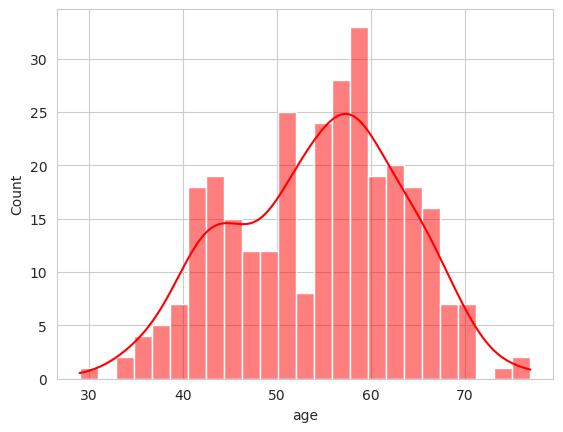

In [31]:
# Plot the distribution of age feature in the dataset using Seaborn
# use Seaborn's distplot() method and specify a number of bins

sns.set_style(style='whitegrid')
sns.histplot(heart['age'], color='red', bins=25, kde=True)
plt.show()

The plot shows that a high percentage of the observations in this dataset are for people aged between 50 and 60.
Before implementing any models, we define the variables, and then split the data into training and test sets.

In [32]:
# Define variables: X is everything but target; y is target.

X = heart.drop('target', axis=1)
y = heart['target']

In [33]:
# Display the first few X entries and compare to the cleaned dataset

X.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,restecg,thalach,exercise_ang,oldpeak,slope,ca,max_heart_rate
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [34]:
# Display the first few y entries and compare to the cleaned dataset

y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [35]:
# Split data to training and test sets with split 70-30
# Use random_state = 42

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building Models
Run Logistic Regression, SVM, and Naive Bayes classifiers and obtain the following for every model:
1. Confusion matrix
2. Accuracy score
3. Classification report

# Logistic Regression

In [36]:
# Run Logistic Regression model

logreg = LogisticRegression(solver='liblinear', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

y_pred, y_pred.shape, y_test.shape, X_test.shape

(array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 0, 1], dtype=int64),
 (91,),
 (91,),
 (91, 13))

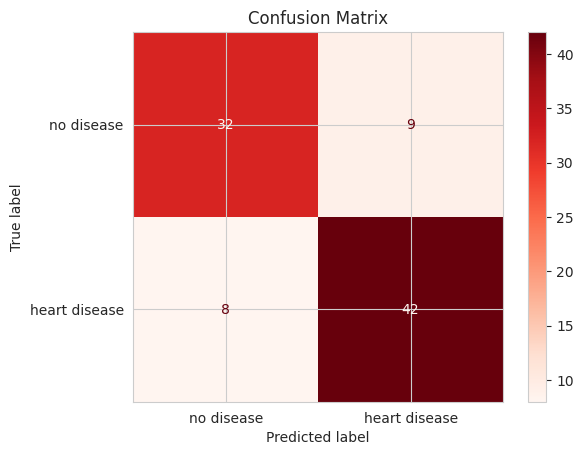

In [37]:
# Obtain and plot the confusion matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no disease', 'heart disease'])
disp.plot(cmap=plt.cm.Reds)
disp.ax_.set_title('Confusion Matrix')
plt.show()

Confusion matrix shows 32 correct negatives and 42 correct positives.

In [38]:
# Compute the accuracy score
logreg_s = logreg.score(X_test, y_test)
print('Accuracy:', logreg_s*100, '%')

# Obtain the classification report
print(classification_report(y_test, y_pred, labels=[0,1], target_names=['no disease', 'heart disease']))

# Obtain the precision score

Accuracy: 81.31868131868131 %
               precision    recall  f1-score   support

   no disease       0.80      0.78      0.79        41
heart disease       0.82      0.84      0.83        50

     accuracy                           0.81        91
    macro avg       0.81      0.81      0.81        91
 weighted avg       0.81      0.81      0.81        91



**Logistic Regression Results:**
- Accuracy score is approximately 0.813, meaning that 81.3% of the observations were correctly classified (as disease or no_disease).
- Precision for "no disease" is 0.80, meaning that out of all the instances predicted as "no disease," 80% were correctly predicted.
- Precision for "heart disease" is 0.82, meaning that out of all the instances predicted as "heart disease," 82% were correctly predicted.

Therefore, the model is performing reasonably well, but we need to compare those metrics with the other model's metrics to decide which of the
three models performs better on the given dataset.

# SVM Classifier

In [39]:
# Run SVM model and obtain the predictions
# create SVM classifier
svm_model = svm.SVC(kernel='linear')

# train the model using the training sets
svm_model.fit(X_train, y_train)

# predict the response for test dataset
y_pred = svm_model.predict(X_test)
y_pred, y_pred.shape, y_test.shape, X_test.shape

(array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 0, 1], dtype=int64),
 (91,),
 (91,),
 (91, 13))

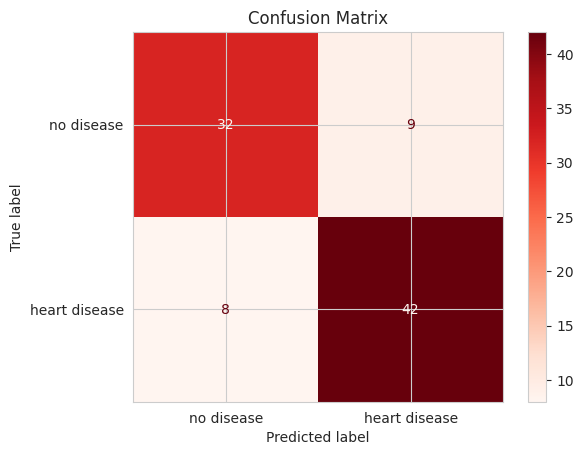

In [40]:
# Obtain and plot the confusion matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no disease', 'heart disease'])
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.show()

In [41]:
# Obtain the accuracy score
svm_model_s = svm_model.score(X_test, y_test)
print('Accuracy:', svm_model_s*100, '%')

# Obtain the classification report
print(classification_report(y_test, y_pred, labels=[0,1], target_names=['no disease', 'heart disease']))

# Obtain the Precision Score

Accuracy: 81.31868131868131 %
               precision    recall  f1-score   support

   no disease       0.80      0.78      0.79        41
heart disease       0.82      0.84      0.83        50

     accuracy                           0.81        91
    macro avg       0.81      0.81      0.81        91
 weighted avg       0.81      0.81      0.81        91



**SVM Classifier Results:**
- Accuracy score is approximately 0.813, meaning that 81.3% of the observations were correctly classified (as disease or no_disease).
- Precision for "no disease" is 0.80, meaning that out of all the instances predicted as "no disease," 80% were correctly predicted.
- Precision for "heart disease" is 0.82, meaning that out of all the instances predicted as "heart disease," 82% were correctly predicted.

Those values are very close to the metric values obtained by the Logistic Regression model which means both models have the same performance.

# Naive Bayes Classifier

In [42]:
# Run the Naive Bayes algorithm
# create a Gaussian Classifier
gnb_model = GaussianNB()

# train the model using the training sets
gnb_model.fit(X_train, y_train)

# predict the reponse for test dataset
y_pred = gnb_model.predict(X_test)
y_pred, y_pred.shape, y_test.shape, X_test.shape

(array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        1, 0, 1], dtype=int64),
 (91,),
 (91,),
 (91, 13))

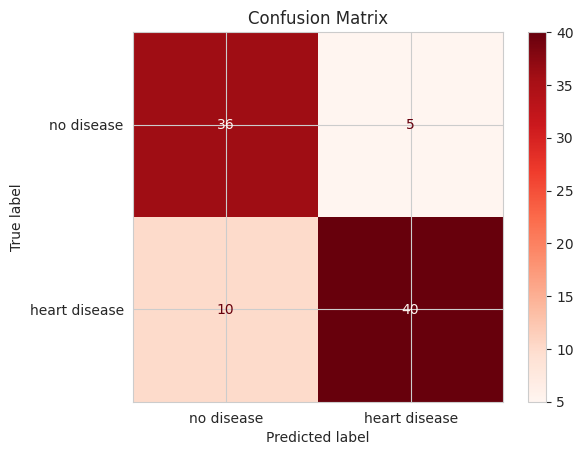

In [43]:
# Obtain and plot the confusion matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no disease', 'heart disease'])
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.show()

In [44]:
# Obtain the accuracy score
gnb_model_s = gnb_model.score(X_test, y_test)
print('Accuracy:', gnb_model_s*100, '%')

# Obtain the classification report
print(classification_report(y_test, y_pred, labels=[0,1], target_names=['no disease', 'heart disease']))

# Obtain the Precision Score

Accuracy: 83.51648351648352 %
               precision    recall  f1-score   support

   no disease       0.78      0.88      0.83        41
heart disease       0.89      0.80      0.84        50

     accuracy                           0.84        91
    macro avg       0.84      0.84      0.83        91
 weighted avg       0.84      0.84      0.84        91



**Naive Bayes Classifier Results:**
- Accuracy score is approximately 0.835, meaning that 83.5% of the observations were correctly classified (as disease or no_disease).
- Precision for "no disease" is 0.78, meaning that out of all the instances predicted as "no disease," 78% were correctly predicted.
- Precision for "heart disease" is 0.89, meaning that out of all the instances predicted as "heart disease," 89% were correctly predicted.

The accuracy of the Naive Bayes Classifier model is slightly higher than the Logistic Regression and SVM Classifier model (both at 0.813).

## Classifier Performance Comparison

| Metric             | SVM     | Logistic Regression | Naive Bayes |
|--------------------|---------|---------------------|-------------|
| **Accuracy**       | 0.813   | 0.813               | 0.835       |
| **Precision (No Disease)** | 0.80    | 0.80                | 0.78        |
| **Precision (Heart Disease)** | 0.82    | 0.82                | 0.89        |
| **Recall (No Disease)**    | 0.78    | 0.78                | 0.88        |
| **Recall (Heart Disease)** | 0.84    | 0.84                | 0.80        |
| **F1-Score (No Disease)**  | 0.79    | 0.79                | 0.83        |
| **F1-Score (Heart Disease)** | 0.83    | 0.83                | 0.84        |

### Summary of Findings:
1. **Accuracy**:
   - Both the SVM and Logistic Regression classifiers achieved an accuracy of approximately 81.3%.
   - The Naive Bayes classifier outperformed the other two with an accuracy of approximately 83.5%.


2. **Precision**:
   - For predicting "no disease", SVM and Logistic Regression have higher precision (0.80) compared to Naive Bayes (0.78).
   - For predicting "heart disease", Naive Bayes has the highest precision (0.89), significantly better than both SVM and Logistic Regression (0.82).


3. **Recall**:
   - For predicting "no disease", Naive Bayes achieves the highest recall (0.88), indicating it is very effective at identifying patients without heart disease.
   - For predicting "heart disease", SVM and Logistic Regression have higher recall (0.84) compared to Naive Bayes (0.80).


4. **F1-Score**:
   - For predicting "no disease", Naive Bayes has the highest F1-score (0.83), indicating a good balance between precision and recall.
   - For predicting "heart disease", the F1-scores are very close, with Naive Bayes slightly leading (0.84) over SVM and Logistic Regression (0.83).
  
### Next Steps:
- Experimenting with more advanced machine learning models such as Random Forests, Gradient Boosting Machines (GBM), and XGBoost can provide insights into their performance compared to the current models.
- Deep learning approaches using neural networks, specifically feedforward neural networks or more sophisticated architectures like convolutional neural networks (CNNs) and recurrent neural networks (RNNs), can be explored for possibly better accuracy and predictive power.
- Conducting hyperparameter tuning using techniques such as grid search or randomized search can optimize model performance.
- Implementing cross-validation will ensure that the results are robust and generalizable to new, unseen data.

### Conclusion:
Based on the comparison, the Naive Bayes classifier demonstrates superior performance overall, particularly in accuracy and precision for predicting heart disease. While SVM and Logistic Regression also perform well and consistently, they do not surpass Naive Bayes in key metrics. Therefore, for the dataset used, Naive Bayes is recommended as the best-performing classifier.
